In [110]:
x_train.shape

(13740, 2700)

# **Business Questions**

# **Exploratory Data Analysis**

In [1]:
# import packages for data cleaning and processing  
import pandas as pd
import numpy as np
from datetime import datetime


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as scs

# import visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

# set display options for Pandas dataframes
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
import pickle

In [187]:
# Read CSV file into notebook
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [188]:
df.shape

(17290, 21)

In [189]:
# Display first 5 rows of dataset
df.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  2591820310  20141006T000000   365000.0         4       2.25         2070   
1  7974200820  20140821T000000   865000.0         5       3.00         2900   
2  7701450110  20140815T000000  1038000.0         4       2.50         3770   
3  9522300010  20150331T000000  1490000.0         3       3.50         4560   
4  9510861140  20140714T000000   711000.0         3       2.50         2550   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      8893     2.0           0     0          4      8        2070   
1      6730     1.0           0     0          5      8        1830   
2     10893     2.0           0     2          3     11        3770   
3     14608     2.0           0     2          3     12        4560   
4      5376     2.0           0     0          3      9        2550   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1986             0    98058  47.4388 -122.162   
1           1070      1977             0    98115  47.6784 -122.285   
2              0      1997             0    98006  47.5646 -122.129   
3              0      1990             0    98034  47.6995 -122.228   
4              0      2004             0    98052  47.6647 -122.083   

   sqft_living15  sqft_lot15  
0           2390        7700  
1           2370        6283  
2           3710        9685  
3           4050       14226  
4           2250        4050

In [190]:
df.tail()

id             date     price  bedrooms  bathrooms  \
17285   627300195  20150303T000000  750000.0         5       2.50   
17286  8819900270  20140520T000000  440000.0         2       1.75   
17287  3816300095  20140514T000000  310000.0         3       1.00   
17288   122069107  20141204T000000  427500.0         3       1.50   
17289  6703100135  20150116T000000  348000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
17285         3240      9960     1.0           0     1          3      8   
17286         1300      4000     2.0           0     0          3      7   
17287         1050      9876     1.0           0     0          3      7   
17288         1900     43186     1.5           0     0          4      7   
17289         1330      6768     1.0           0     0          4      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
17285        2020           1220      1958             0    98008  47.5858   
17286        1300              0      1948             0    98105  47.6687   
17287        1050              0      1953             0    98028  47.7635   
17288        1300            600      1971             0    98038  47.4199   
17289        1330              0      1952             0    98155  47.7366   

          long  sqft_living15  sqft_lot15  
17285 -122.112           2730       10400  
17286 -122.288           1350        4013  
17287 -122.262           1760        9403  
17288 -121.990           2080      108028  
17289 -122.319           1320        6910

In [191]:
# Get descriptive analytics of dataset
df.describe()

00   
mean   1.524340e+04      1.490312      0.007981      0.238519      3.408502   
std    4.230462e+04      0.538909      0.088985      0.775229      0.651296   
min    5.720000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.081250e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.642000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.072575e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  17290.000000  17290.000000   17290.000000  17290.000000  17290.000000   
mean       7.654425   1789.306015     292.158589   1970.792019     83.806304   
std        1.174718    829.265107     443.151874     29.343516    400.329376   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1974.000000      0.000000   
75%        8.000000   2214.500000     560.000000   1996.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  17290.000000  17290.000000  17290.000000   17290.000000   17290.000000  
mean   98078.193175     47.560058   -122.214258    1987.986698   12873.475824  
std       53.607949      0.138412      0.140857     684.802635   27227.437583  
min    98001.000000     47.155900   -122.519000     399.000000     659.000000  
25%    98033.000000     47.471200   -122.329000    1490.000000    5111.250000  
50%    98065.000000     47.571600   -122.230000    1840.000000    7622.500000  
75%    98118.000000     47.677900   -122.126000    2360.000000   10101.750000  
max    98199.000000     47.777600   -121.315000    6210.000000  858132.000000

**Initial Observations:**

- waterfront is a binary discrete variable
- sqft_above + sqft_basement = sqft_living
- sqft_basement and yr_renovated have many null values, potentially express them as binary variables
- categorical variables:  floors, view, grade, zipcode, bathrooms, bedrooms, condition
- continuous variables: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

In [192]:
# Look for any column types that need conversion
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
                  ...   
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
Length: 21, dtype: object

## **Initial Data Cleaning**

In [193]:
# Check for the unique number of non-null values in 'id' subset
df['id'].nunique()


17176

In [194]:
# Drop duplicates from 'id' column 
df = df.drop_duplicates(subset='id')

In [195]:
# Check for any null values in the dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
                ..
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Length: 21, dtype: int64

In [196]:
# Put features into categorical and continuous subsets
feat_cat = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]

In [197]:
# Get indices of the subsetted columns
col_con = feat_con.columns
col_cat = feat_cat.columns

## **Continuous variables**

In [198]:
# Display distribution plots of continuous
# con_1 = pd.melt(df, value_vars = col_con)
# g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.distplot, 'value', color='r')
# g.set_xticklabels(rotation=45)
# plt.savefig('df_distplot.jpg')

upload

**Observations:**

- sqft_living, sqft_basement, sqft_living15 are skewed to the right

In [199]:
# Scatterplots of continuous variables
# con_2 = pd.melt(df, id_vars='price', value_vars=col_con)
# g = sns.FacetGrid(con_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='darkorange')
# g.set_xticklabels(rotation=45)
# plt.savefig('df_scatter.png')

### Correlation and Colinearity

In [201]:
# Correlation Matrix of continuous variables
# feat_cont = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]
# corr_matrix = feat_cont.corr()
# plt.figure(figsize=(20,15))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
# plt.show()
# plt.savefig("df_corr.png")


**Observations:**
- strong correlation between price and sqft_living, sqft_above, sqft_living15
- sqft_living, sqft_above, sqft_basement must be related since sqft_above + sqft_basement = sqft_living
- perhaps colinearity with sqrt_living and sqft_above
- stronger correlation with latitude than longitude
- little correlation with yr_renovated, yr_built, sqft_basement, sqft_lot, sqft_lot15

## **Categorical Variables**

In [183]:
# Display bar graphs of categorical variables to see distribution of data
# cat_1 = pd.melt(df, value_vars=col_cat)
# g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.countplot, 'value', color='g')
# g.set_xticklabels(rotation=90)
# plt.savefig('df_countplot.png')

In [182]:
# Create scatterplots for categorical variables to observe any relationships
# cat_2 = pd.melt(df,id_vars='price', value_vars=col_cat)
# g = sns.FacetGrid(cat_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
# g = g.map(sns.regplot, 'value', 'price', color='dodgerblue')
# g.set_xticklabels(rotation=90)
# plt.savefig('df_regplot.png')

In [181]:
# Display boxplots of categorical variables to observe any trends in the mean values of each category
#cat_3 = pd.melt(df, id_vars='price', value_vars=col_cat)
#g = sns.FacetGrid(cat_3, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
#g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
#g.set_xticklabels(rotation=90)
#plt.savefig('df_boxplot.png')

**Obseervations:**

- 33 bedrooms is an outlier, potentially replace with 3 bedrooms
- 11 bedrooms may or may not be inputted incorrectly
- strong exponential relationship in the mean values for number of bathrooms and grade
- little correlation with mean views, perhaps express as binary variable
- potentially replace outliers with the mean for grade and bathrooms

## **Data Cleaning**

In [202]:
# Convert 'date' column to datetime format, rename to 'sale_date', and drop original column
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.head()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2591820310   365000.0         4       2.25         2070      8893     2.0   
1  7974200820   865000.0         5       3.00         2900      6730     1.0   
2  7701450110  1038000.0         4       2.50         3770     10893     2.0   
3  9522300010  1490000.0         3       3.50         4560     14608     2.0   
4  9510861140   711000.0         3       2.50         2550      5376     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          4      8        2070              0      1986   
1           0     0          5      8        1830           1070      1977   
2           0     2          3     11        3770              0      1997   
3           0     2          3     12        4560              0      1990   
4           0     0          3      9        2550              0      2004   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0             0    98058  47.4388 -122.162           2390        7700   
1             0    98115  47.6784 -122.285           2370        6283   
2             0    98006  47.5646 -122.129           3710        9685   
3             0    98034  47.6995 -122.228           4050       14226   
4             0    98052  47.6647 -122.083           2250        4050   

   sale_date  
0 2014-10-06  
1 2014-08-21  
2 2014-08-15  
3 2015-03-31  
4 2014-07-14

In [203]:
# Drop 'id' column and check dataframe
df.drop(['id'], inplace=True, axis=1)
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   365000.0         4       2.25         2070      8893     2.0           0   
1   865000.0         5       3.00         2900      6730     1.0           0   
2  1038000.0         4       2.50         3770     10893     2.0           0   
3  1490000.0         3       3.50         4560     14608     2.0           0   
4   711000.0         3       2.50         2550      5376     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          4      8        2070              0      1986             0   
1     0          5      8        1830           1070      1977             0   
2     2          3     11        3770              0      1997             0   
3     2          3     12        4560              0      1990             0   
4     0          3      9        2550              0      2004             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  sale_date  
0    98058  47.4388 -122.162           2390        7700 2014-10-06  
1    98115  47.6784 -122.285           2370        6283 2014-08-21  
2    98006  47.5646 -122.129           3710        9685 2014-08-15  
3    98034  47.6995 -122.228           4050       14226 2015-03-31  
4    98052  47.6647 -122.083           2250        4050 2014-07-14

In [204]:
# Replace anomalous bedroom values and check values in column
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.replace({'bedrooms': {11: 1}}, inplace=True)
df.bedrooms.value_counts()

3     7804
4     5470
2     2186
5     1271
6      224
1      161
7       30
0       12
8       10
9        5
10       3
Name: bedrooms, dtype: int64

In [205]:
df[df.grade==11].sort_values('price', ascending=False)

4          4     11        5770              0   
260             1     4          5     11        3910           1570   
1020            1     4          4     11        4830              0   
10286           0     0          3     11        5450              0   
...           ...   ...        ...    ...         ...            ...   
8344            0     0          3     11        4150              0   
13984           0     0          3     11        3630              0   
2905            0     0          4     11        4620              0   
5668            0     0          3     11        3840              0   
3107            0     0          3     11        4180              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6903       1940          2001    98004  47.6500 -122.214           3930   
3903       1980             0    98040  47.5850 -122.222           4620   
260        1936             0    98105  47.6515 -122.277           3510   
1020       1990             0    98039  47.6409 -122.241           3820   
10286      2014             0    98039  47.6209 -122.237           3160   
...         ...           ...      ...      ...      ...            ...   
8344       2006             0    98003  47.3417 -122.182           3840   
13984      2000             0    98058  47.4243 -122.097           3620   
2905       1991             0    98023  47.2929 -122.342           3640   
5668       1991             0    98023  47.2996 -122.342           3270   
3107       1986          1998    98038  47.4000 -122.027           3010   

       sqft_lot15  sale_date  
6903        25449 2014-06-11  
3903        22748 2014-11-14  
260         15810 2015-04-21  
1020        25582 2014-09-11  
10286       17825 2014-10-07  
...           ...        ...  
8344        15121 2015-02-06  
13984       41965 2014-12-19  
2905        20793 2014-06-24  
5668        12133 2014-05-23  
3107        35190 2014-09-24  

[319 rows x 20 columns]

In [206]:
df[df.bathrooms==4.5].sort_values('price', ascending=False)

4          3     10        3540           1310   
5293            0     2          5     11        4760           1450   
16000           0     4          3     10        4340              0   
3181            1     4          3     11        3400           1870   
...           ...   ...        ...    ...         ...            ...   
8924            0     0          5      7        2690              0   
1835            0     0          4      8        2940              0   
14681           0     0          3      8        3100              0   
13472           0     0          3      7        3560              0   
9224            0     0          3      8        2010            800   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
6903       1940          2001    98004  47.6500 -122.214           3930   
7823       2007             0    98008  47.5943 -122.110           3470   
5293       1910             0    98109  47.6307 -122.354           2940   
16000      2010             0    98107  47.6715 -122.406           1770   
3181       1979             0    98027  47.5696 -122.090           3390   
...         ...           ...      ...      ...      ...            ...   
8924       1949             0    98125  47.7062 -122.311           1660   
1835       1966             0    98034  47.7208 -122.182           2010   
14681      1963          2000    98059  47.5004 -122.162           1650   
13472      1989             0    98002  47.3244 -122.217           1710   
9224       1958             0    98031  47.4045 -122.197           1940   

       sqft_lot15  sale_date  
6903        25449 2014-06-11  
7823        18270 2015-01-07  
5293         5400 2014-05-07  
16000        5250 2015-03-04  
3181         9905 2014-12-16  
...           ...        ...  
8924         9000 2014-11-25  
1835         7500 2014-09-05  
14681        7700 2015-02-25  
13472       11116 2015-05-06  
9224         8349 2014-07-31  

[75 rows x 20 columns]

## **Feature Engineering**

In [207]:
# Create new feature to incorporate built and renovation year
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
# Reset display options set in the beginning
pd.set_option('display.max_rows', 20)
# Look for anomalous values
df.sale_age.value_counts(ascending=False)

 0      418
 9      385
 11     374
 10     370
 8      369
       ... 
 112     21
 115     17
 81      15
 80      12
-1       10
Name: sale_age, Length: 117, dtype: int64

In [208]:
# Replace anomalous values
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

0      428
9      385
11     374
10     370
8      369
      ... 
113     23
112     21
115     17
81      15
80      12
Name: sale_age, Length: 116, dtype: int64

In [209]:
# Create binary variable for whether there has been a renovation, has a bathroom, and has been viewed
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
# Drop original columms as well as the sale_date columns since it is in datetime format
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [210]:
# Check for any anomalous values
print(df.basement.value_counts())
print(df.viewed.value_counts())
print(df.renovated.value_counts())

0    10414
1     6762
Name: basement, dtype: int64
0    15462
1     1714
Name: viewed, dtype: int64
0    16452
1      724
Name: renovated, dtype: int64


In [211]:
# double-check for null values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sale_age         0
renovated        0
basement         0
viewed           0
dtype: int64

### **Creating Dummy Variables for Categoricals**


In [71]:
# Get index of the columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age', 'renovated',
       'basement', 'viewed'],
      dtype='object')

In [72]:
# Recreate categorical and continuous subsets of features after feature engineering
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sale_age']]
feat_cat = df[['bedrooms', 'bathrooms', 'waterfront', 'floors', 'viewed', 'condition', 'grade', 'renovated', 'basement']]
index_cat = feat_cat.columns

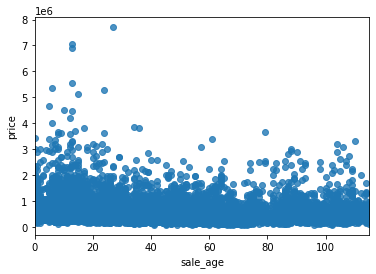

In [73]:
sns.regplot('sale_age', 'price', df)

In [179]:
df['sale_age_2'] = (df.sale_age)^2
df.sale_age_2.value_counts()

2      428
11     385
9      374
8      370
10     369
      ... 
115     23
114     21
113     17
83      15
82      12
Name: sale_age_2, Length: 116, dtype: int64

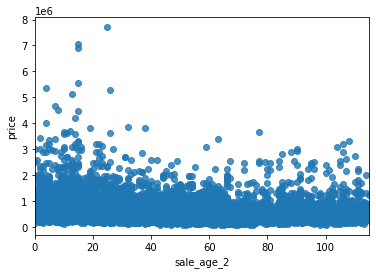

In [177]:
sns.regplot('sale_age_2', 'price', df)

In [180]:
#cat_4 = pd.melt(df, id_vars='price', value_vars=index_cat)
#g = sns.FacetGrid(cat_4, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
#g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
#g.set_xticklabels(rotation=90)
#plt.savefig('df_boxplot.png')

In [34]:
# Set categorical features as category type
df.bedrooms = df.bedrooms.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.floors = df.floors.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.renovated = df.renovated.astype('category')
df.basement = df.basement.astype('category')
df.viewed = df.viewed.astype('category')

# Check datatype
df.bedrooms.dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ordered=False)

In [35]:
# Grab indices of columns for creating dummy variables and set dataframe to dum
index_dum = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']].columns
df_dum = pd.get_dummies(data=df, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd'])
df_dum.head()

0         0        0         0        0         0   
3        0         0        0         0        1         0        0         0   
4        1         0        0         0        0         0        0         0   

   bth_4.5  bth_4.75  bth_5.0  bth_5.25  bth_5.5  bth_5.75  bth_6.0  bth_6.25  \
0        0         0        0         0        0         0        0         0   
1        0         0        0         0        0         0        0         0   
2        0         0        0         0        0         0        0         0   
3        0         0        0         0        0         0        0         0   
4        0         0        0         0        0         0        0         0   

   bth_6.5  bth_6.75  bth_7.5  bth_7.75  bth_8.0  flr_1.5  flr_2.0  flr_2.5  \
0        0         0        0         0        0        0        1        0   
1        0         0        0         0        0        0        0        0   
2        0         0        0         0        0        0        1        0   
3        0         0        0         0        0        0        1        0   
4        0         0        0         0        0        0        1        0   

   flr_3.0  flr_3.5  cnd_2  cnd_3  cnd_4  cnd_5  grd_3  grd_4  grd_5  grd_6  \
0        0        0      0      0      1      0      0      0      0      0   
1        0        0      0      0      0      1      0      0      0      0   
2        0        0      0      1      0      0      0      0      0      0   
3        0        0      0      1      0      0      0      0      0      0   
4        0        0      0      1      0      0      0      0      0      0   

   grd_7  grd_8  grd_9  grd_10  grd_11  grd_12  grd_13  
0      0      1      0       0       0       0       0  
1      0      1      0       0       0       0       0  
2      0      0      0       0       1       0       0  
3      0      0      0       0       0       1       0  
4      0      0      1       0       0       0       0

### **Polynomial and Interaction Features**

In [36]:
# Get dataframe of columns to get polynomial and interaction features
df_features = df_dum.drop('price', axis=1)
# Get target series
target = df_dum['price']
df_features

0      1   
3            0        0        1        0        0        0      0      1   
4            0        0        1        0        0        0      0      1   
...        ...      ...      ...      ...      ...      ...    ...    ...   
17285        0        0        0        0        0        0      0      1   
17286        0        0        1        0        0        0      0      1   
17287        0        0        0        0        0        0      0      1   
17288        0        1        0        0        0        0      0      0   
17289        0        0        0        0        0        0      0      0   

       cnd_4  cnd_5  grd_3  grd_4  grd_5  grd_6  grd_7  grd_8  grd_9  grd_10  \
0          1      0      0      0      0      0      0      1      0       0   
1          0      1      0      0      0      0      0      1      0       0   
2          0      0      0      0      0      0      0      0      0       0   
3          0      0      0      0      0      0      0      0      0       0   
4          0      0      0      0      0      0      0      0      1       0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
17285      0      0      0      0      0      0      0      1      0       0   
17286      0      0      0      0      0      0      1      0      0       0   
17287      0      0      0      0      0      0      1      0      0       0   
17288      1      0      0      0      0      0      1      0      0       0   
17289      1      0      0      0      0      0      1      0      0       0   

       grd_11  grd_12  grd_13  
0           0       0       0  
1           0       0       0  
2           1       0       0  
3           0       1       0  
4           0       0       0  
...       ...     ...     ...  
17285       0       0       0  
17286       0       0       0  
17287       0       0       0  
17288       0       0       0  
17289       0       0       0  

[17176 rows x 72 columns]

In [74]:
# Use SKlearn to create binomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

array([[ 2070.,  8893.,     0., ...,     0.,     0.,     0.],
       [ 2900.,  6730.,     0., ...,     0.,     0.,     0.],
       [ 3770., 10893.,     0., ...,     0.,     0.,     0.],
       ...,
       [ 1050.,  9876.,     0., ...,     0.,     0.,     0.],
       [ 1900., 43186.,     0., ...,     0.,     0.,     0.],
       [ 1330.,  6768.,     0., ...,     0.,     0.,     0.]])

In [77]:
# Use scikit-learn to fit and assess new model
# instantiate a linear regression object # fit the linear regression to the data
lm_2 = LinearRegression()
lm_2 = lm_2.fit(df_poly, target)
print(lm_2.intercept_)
print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

35189591762.97262
[ 3.16889156e+06 -2.80496812e+04  5.49897406e+07 ... -2.09905003e+08
  0.00000000e+00  1.62765027e+00]
R^2:  0.8205562569101579


## **Train-Test Split**

### Identify features and target variable

In [78]:
df_poly.columns

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age',
       ...
       'grd_10^2', 'grd_10 grd_11', 'grd_10 grd_12', 'grd_10 grd_13',
       'grd_11^2', 'grd_11 grd_12', 'grd_11 grd_13', 'grd_12^2',
       'grd_12 grd_13', 'grd_13^2'],
      dtype='object', length=2700)

In [79]:
features = df_poly
target = df_dum['price']

In [80]:
features

0.0       0.0   
17172           0.0           0.0           0.0           0.0       0.0   
17173           0.0           0.0           0.0           0.0       0.0   
17174           0.0           0.0           0.0           0.0       0.0   
17175           0.0           0.0           0.0           0.0       0.0   

       grd_10 grd_11  grd_10 grd_12  grd_10 grd_13  grd_11^2  grd_11 grd_12  \
0                0.0            0.0            0.0       0.0            0.0   
1                0.0            0.0            0.0       0.0            0.0   
2                0.0            0.0            0.0       1.0            0.0   
3                0.0            0.0            0.0       0.0            0.0   
4                0.0            0.0            0.0       0.0            0.0   
...              ...            ...            ...       ...            ...   
17171            0.0            0.0            0.0       0.0            0.0   
17172            0.0            0.0            0.0       0.0            0.0   
17173            0.0            0.0            0.0       0.0            0.0   
17174            0.0            0.0            0.0       0.0            0.0   
17175            0.0            0.0            0.0       0.0            0.0   

       grd_11 grd_13  grd_12^2  grd_12 grd_13  grd_13^2  
0                0.0       0.0            0.0       0.0  
1                0.0       0.0            0.0       0.0  
2                0.0       0.0            0.0       0.0  
3                0.0       1.0            0.0       0.0  
4                0.0       0.0            0.0       0.0  
...              ...       ...            ...       ...  
17171            0.0       0.0            0.0       0.0  
17172            0.0       0.0            0.0       0.0  
17173            0.0       0.0            0.0       0.0  
17174            0.0       0.0            0.0       0.0  
17175            0.0       0.0            0.0       0.0  

[17176 rows x 2700 columns]

### Create Train and Test Split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34, test_size=0.2)
print("Training Set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing Set - Features: ", x_test.shape, "Target: ", y_test.shape)

Training Set - Features:  (13740, 2700) Target:  (13740,)
Testing Set - Features:  (3436, 2700) Target:  (3436,)


In [82]:
lm = linear_model.LinearRegression()
lm = lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print("R^2 Score: ", lm.score(x_train, y_train))

33670031831.09995
[ 1.18537215e+07 -2.19278192e+04  7.20477868e+07 ...  8.63572918e+06
  0.00000000e+00  7.74360917e-01]
R^2 Score:  0.8773466150085426


### Model Performance

In [83]:
y_train_pred = lm.predict(x_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()
print('Mean Absolute Error: ', train_mae)
print('Mean Squared Error: ', train_mse)
print('Root Mean Squared Error: ', train_rmse)
print('Z-Score of Mean Absolute Error: ', train_mae/price_std)
print('Z-Score of Root Mean Squared Error: ', train_rmse/price_std)

Mean Absolute Error:  91114.85608689365
Mean Squared Error:  17381154843.69151
Root Mean Squared Error:  131837.6078503077
Z-Score of Mean Absolute Error:  0.2438349502572931
Z-Score of Root Mean Squared Error:  0.3528142163947773


### Predicting Test Set and *comparing* model performance on training vs. test data

In [84]:
y_pred = lm.predict(x_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Score: ", lm.score(x_test, y_test))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error Z: ', test_mae/price_std)
print('Root Mean Squared Error Z: ', test_rmse/price_std)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Score:  -15388223.577193366
Mean Absolute Error: 28520385.47613443
Mean Squared Error: 2.020255713455701e+18
Root Mean Squared Error: 1421356997.1881452
Mean Absolute Error Z:  76.32418106724525
Root Mean Squared Error Z:  3803.7322078049124
Training:  131837 vs. Testing:  1421356997


### Check assumptions of linear regression

In [85]:
residuals = (y_test - y_pred)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.435e+03]),
 array([-8.30200491e+10, -7.41876103e+10, -6.53551715e+10, -5.65227327e+10,
        -4.76902939e+10, -3.88578551e+10, -3.00254163e+10, -2.11929775e+10,
        -1.23605387e+10, -3.52809993e+09,  5.30433886e+09]),
 <a list of 10 Patch objects>)

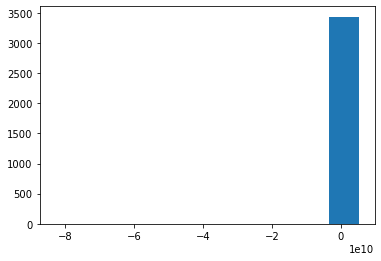

In [86]:
plt.hist(residuals)

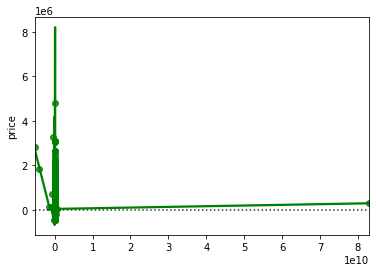

In [89]:
sns.residplot(y_pred, y_test, lowess=True, color='g')

## **Feature Selection (K-best, recursive)**


### K-best

In [109]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=9, test_size=0.2)
selector = SelectKBest(f_regression, k=20)
selector.fit(x_train, y_train)
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [113]:
list(selected_columns)

['sqft_living',
 'sqft_above',
 'sqft_living15',
 'sqft_living^2',
 'sqft_living sqft_above',
 'sqft_living zipcode',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'sqft_living viewed',
 'sqft_above^2',
 'sqft_above zipcode',
 'sqft_above lat',
 'sqft_above long',
 'sqft_above sqft_living15',
 'sqft_above viewed',
 'zipcode sqft_living15',
 'lat sqft_living15',
 'long sqft_living15',
 'sqft_living15^2']

In [114]:
#instantiate a linear regression object, #fit the linear regression to the data
kbest = LinearRegression()
kbest.fit(x_train[selected_columns], y_train)
y_train_qqkbest = lm_kbest.predict(x_train[selected_columns])
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
y_kbest = lm_kbest.predict(x_test[selected_columns])
testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)
print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 208007.91993668766
Testing Root Mean Squared Error: 203488.65952179226


In [115]:
list(zip(selected_columns, lm_kbest.coef_))

[('sqft_living', -31012800.673651792),
 ('sqft_above', 20038871.619434208),
 ('sqft_living15', -4891353.035136379),
 ('sqft_living^2', -140394.19593676843),
 ('sqft_living sqft_above', 395223.17507014296),
 ('sqft_living zipcode', -67058887.754828505),
 ('sqft_living lat', 12057003.184375163),
 ('sqft_living long', -85885881.51030158),
 ('sqft_living sqft_living15', 344422.5725863278),
 ('sqft_living viewed', -4979.008945058719),
 ('sqft_above^2', -49943.70685095853),
 ('sqft_above zipcode', 1607060.3239394294),
 ('sqft_above lat', 3059287.83683497),
 ('sqft_above long', 24555929.21064248),
 ('sqft_above sqft_living15', -413916.4940656967),
 ('sqft_above viewed', 66927.34013352325),
 ('zipcode sqft_living15', 32403325.083173387),
 ('lat sqft_living15', 422337.2266160674),
 ('long sqft_living15', 27879444.567813423),
 ('sqft_living15^2', 68458.76193579225)]

In [116]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  1421356997.1881452 
 KBest:    203488.65952179226 



# Second Run

In [133]:
df2 = df.copy()
df2['log_sqft_liv'] = np.log(df2.sqft_living)
df2['log_sqft_liv15'] = np.log(df2.sqft_living15)
df2['log_sqft_lot'] = np.log(df2.sqft_lot)
df2['log_sqft_lot15'] = np.log(df2.sqft_lot15)
df2.drop(['sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], axis=1, inplace=True)

In [135]:
df2.drop('sqft_above', axis=1, inplace=True)
df2.bedrooms = df.bedrooms.astype('category')
df2.bathrooms = df.bathrooms.astype('category')
df2.grade = df.grade.astype('category')
df2.renovated = df.renovated.astype('category')
df2.basement = df.basement.astype('category')
df2.viewed = df.viewed.astype('category')
df2.drop(['floors', 'condition'], inplace=True, axis=1)

In [137]:
index_dum = df2[['bedrooms', 'bathrooms', 'grade']].columns
df2_dum = pd.get_dummies(data=df2, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'grd'])
df2_dum.head()

0         0        0         0   
3        0         0        0         0        0         0        0         0   
4        0         0        0         0        0         0        0         0   

   bth_2.5  bth_2.75  bth_3.0  bth_3.25  bth_3.5  bth_3.75  bth_4.0  bth_4.25  \
0        0         0        0         0        0         0        0         0   
1        0         0        1         0        0         0        0         0   
2        1         0        0         0        0         0        0         0   
3        0         0        0         0        1         0        0         0   
4        1         0        0         0        0         0        0         0   

   bth_4.5  bth_4.75  bth_5.0  bth_5.25  bth_5.5  bth_5.75  bth_6.0  bth_6.25  \
0        0         0        0         0        0         0        0         0   
1        0         0        0         0        0         0        0         0   
2        0         0        0         0        0         0        0         0   
3        0         0        0         0        0         0        0         0   
4        0         0        0         0        0         0        0         0   

   bth_6.5  bth_6.75  bth_7.5  bth_7.75  bth_8.0  grd_3  grd_4  grd_5  grd_6  \
0        0         0        0         0        0      0      0      0      0   
1        0         0        0         0        0      0      0      0      0   
2        0         0        0         0        0      0      0      0      0   
3        0         0        0         0        0      0      0      0      0   
4        0         0        0         0        0      0      0      0      0   

   grd_7  grd_8  grd_9  grd_10  grd_11  grd_12  grd_13  
0      0      1      0       0       0       0       0  
1      0      1      0       0       0       0       0  
2      0      0      0       0       1       0       0  
3      0      0      0       0       0       1       0  
4      0      0      1       0       0       0       0

In [141]:
features = df2_dum.drop('price', axis=1)
target = df2['price']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(features)
poly_columns = poly.get_feature_names(features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

d_9  \
0           0.0           0.0           0.0      1.0          0.0   
1           0.0           0.0           0.0      1.0          0.0   
2           0.0           0.0           0.0      0.0          0.0   
3           0.0           0.0           0.0      0.0          0.0   
4           0.0           0.0           0.0      0.0          0.0   

   grd_8 grd_10  grd_8 grd_11  grd_8 grd_12  grd_8 grd_13  grd_9^2  \
0           0.0           0.0           0.0           0.0      0.0   
1           0.0           0.0           0.0           0.0      0.0   
2           0.0           0.0           0.0           0.0      0.0   
3           0.0           0.0           0.0           0.0      0.0   
4           0.0           0.0           0.0           0.0      1.0   

   grd_9 grd_10  grd_9 grd_11  grd_9 grd_12  grd_9 grd_13  grd_10^2  \
0           0.0           0.0           0.0           0.0       0.0   
1           0.0           0.0           0.0           0.0       0.0   
2           0.0           0.0           0.0           0.0       0.0   
3           0.0           0.0           0.0           0.0       0.0   
4           0.0           0.0           0.0           0.0       0.0   

   grd_10 grd_11  grd_10 grd_12  grd_10 grd_13  grd_11^2  grd_11 grd_12  \
0            0.0            0.0            0.0       0.0            0.0   
1            0.0            0.0            0.0       0.0            0.0   
2            0.0            0.0            0.0       1.0            0.0   
3            0.0            0.0            0.0       0.0            0.0   
4            0.0            0.0            0.0       0.0            0.0   

   grd_11 grd_13  grd_12^2  grd_12 grd_13  grd_13^2  
0            0.0       0.0            0.0       0.0  
1            0.0       0.0            0.0       0.0  
2            0.0       0.0            0.0       0.0  
3            0.0       1.0            0.0       0.0  
4            0.0       0.0            0.0       0.0  

[5 rows x 2015 columns]

In [142]:
# Use scikit-learn to fit and assess new model
lm_2 = LinearRegression()
lm_2 = lm_2.fit(df_poly, target)
print(lm_2.intercept_)
print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

35774580192.9508
[ 5.46169084e+10 -7.01170854e+05  7.01657259e+07 ... -2.50129371e+08
  0.00000000e+00  1.42628559e+05]
R^2:  0.8636330866376429


In [143]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34, test_size=0.2)
print("Training Set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing Set - Features: ", x_test.shape, "Target: ", y_test.shape)
lm = linear_model.LinearRegression()
lm = lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print("R^2 Score: ", lm.score(x_train, y_train))

Training Set - Features:  (13740, 62) Target:  (13740,)
Testing Set - Features:  (3436, 62) Target:  (3436,)
13713711.54546324
[ 6.53550599e+05 -6.37927810e+02  5.94741923e+05 -1.55041773e+05
  2.29490540e+03  1.91120167e+05  9.88732633e+02  1.08554502e+05
  2.15876279e+05  1.01418774e+05 -6.35634430e+03 -2.32228429e+04
 -3.89987919e+03  1.23981018e+03 -2.14762390e+04 -3.59275924e+04
 -2.45545028e+04 -7.03182208e+04 -1.79825402e+05  2.03904317e+05
 -2.37059452e+05 -5.36126502e+05 -2.79681865e+04 -1.18137898e+04
  3.58397679e+04  2.30741634e+04  3.77455611e+04  3.38346013e+04
  4.23626479e+04  4.93539871e+04  3.64096497e+04  4.48632086e+04
  9.59281990e+04  1.39137023e+05  1.28276616e+05  2.07600757e+05
  1.78180830e+05  3.50053325e+05  3.49680672e+05  5.69112730e+05
  3.89845550e+05  7.57919783e+05  1.08955384e+06  1.30016401e+06
  1.19106509e+06 -4.70746271e+05  6.34521018e+05  7.20942917e+05
  1.94441397e+05  3.69269061e+06  2.34464611e+06  8.43909932e+04
 -1.83227502e+05 -2.58207343

In [144]:
y_train_pred = lm.predict(x_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()
print('Mean Absolute Error: ', train_mae)
print('Mean Squared Error: ', train_mse)
print('Root Mean Squared Error: ', train_rmse)
print('Z-Score of Mean Absolute Error: ', train_mae/price_std)
print('Z-Score of Root Mean Squared Error: ', train_rmse/price_std)

Mean Absolute Error:  121376.12549155057
Mean Squared Error:  38042346091.8106
Root Mean Squared Error:  195044.47208729244
Z-Score of Mean Absolute Error:  0.3248179582639145
Z-Score of Root Mean Squared Error:  0.5219638288624371


In [145]:
y_pred = lm.predict(x_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Score: ", lm.score(x_test, y_test))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error Z: ', test_mae/price_std)
print('Root Mean Squared Error Z: ', test_rmse/price_std)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Score:  0.7206265996834312
Mean Absolute Error: 118101.25062584163
Mean Squared Error: 36677766518.53595
Root Mean Squared Error: 191514.40290102453
Mean Absolute Error Z:  0.3160539763593888
Root Mean Squared Error Z:  0.5125169144798082
Training:  195044 vs. Testing:  191514


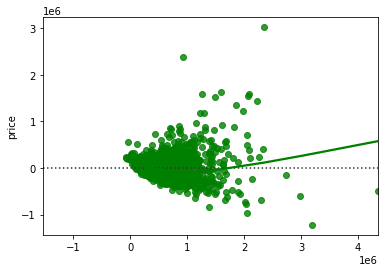

In [146]:
residuals = (y_test - y_pred)
sns.residplot(y_pred, y_test, lowess=True, color='g')

(array([3.000e+00, 3.200e+01, 2.001e+03, 1.335e+03, 4.900e+01, 7.000e+00,
        7.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([-1254533.15846519,  -829432.2192578 ,  -404331.28005041,
           20769.65915698,   445870.59836438,   870971.53757177,
         1296072.47677916,  1721173.41598655,  2146274.35519395,
         2571375.29440134,  2996476.23360873]),
 <a list of 10 Patch objects>)

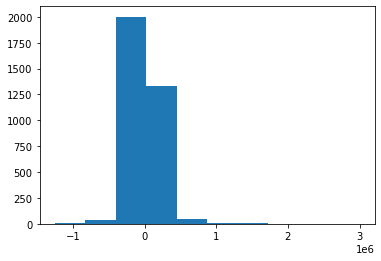

In [147]:
plt.hist(residuals)

In [148]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=9, test_size=0.2)
selector = SelectKBest(f_regression, k=20)
selector.fit(x_train, y_train)
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [149]:
list(selected_columns)

['waterfront',
 'lat',
 'basement',
 'viewed',
 'log_sqft_liv',
 'log_sqft_liv15',
 'log_sqft_lot',
 'bdr_3',
 'bdr_4',
 'bdr_5',
 'bth_1.0',
 'bth_3.25',
 'bth_3.5',
 'grd_6',
 'grd_7',
 'grd_9',
 'grd_10',
 'grd_11',
 'grd_12',
 'grd_13']

In [150]:
#instantiate a linear regression object, #fit the linear regression to the data
kbest = LinearRegression()
kbest.fit(x_train[selected_columns], y_train)
y_train_qqkbest = lm_kbest.predict(x_train[selected_columns])
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)
y_kbest = lm_kbest.predict(x_test[selected_columns])
testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 208007.91993668766
Testing Root Mean Squared Error: 523446894.039649


In [151]:
list(zip(selected_columns, lm_kbest.coef_))
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')


Original:  191514.40290102453 
 KBest:    523446894.039649 



In [175]:
ols = linear_model.LinearRegression()
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
selector.fit(x_train, y_train)
selected = x_train.columns[selector.support_]
removed = x_train.columns[~selector.support_]
lm = LinearRegression()
lm = lm.fit(x_train[selected], y_train)
y = lm.predict(x_train[selected])
train = np.sqrt(metrics.mean_squared_error(y_train, y))
y_pred = lm.predict(x_test[selected])
test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Root Mean Squared Error:' , train)
print('Testing Root Mean Squared Error:' , test)
print("Original: ", test_rmse, "\n",
      "KBest:   ", testK_rmse, "\n",
      "RFE:     ", test)

Training Root Mean Squared Error: 195811.1195169985
Testing Root Mean Squared Error: 187432.17826324556
Original:  191514.40290102453 
 KBest:    523446894.039649 
 RFE:      187432.17826324556


# Third Model

In [167]:
df3 = df.copy()
df3

17288   427500.0         3       1.50         1900     43186     1.5   
17289   348000.0         3       1.50         1330      6768     1.0   

       waterfront  condition  grade  sqft_above  zipcode      lat     long  \
0               0          4      8        2070    98058  47.4388 -122.162   
1               0          5      8        1830    98115  47.6784 -122.285   
2               0          3     11        3770    98006  47.5646 -122.129   
3               0          3     12        4560    98034  47.6995 -122.228   
4               0          3      9        2550    98052  47.6647 -122.083   
...           ...        ...    ...         ...      ...      ...      ...   
17285           0          3      8        2020    98008  47.5858 -122.112   
17286           0          3      7        1300    98105  47.6687 -122.288   
17287           0          3      7        1050    98028  47.7635 -122.262   
17288           0          4      7        1300    98038  47.4199 -121.990   
17289           0          4      7        1330    98155  47.7366 -122.319   

       sqft_living15  sqft_lot15  sale_age  renovated  basement  viewed  
0               2390        7700        28          0         0       0  
1               2370        6283        37          0         1       0  
2               3710        9685        17          0         0       1  
3               4050       14226        25          0         0       1  
4               2250        4050        10          0         0       0  
...              ...         ...       ...        ...       ...     ...  
17285           2730       10400        57          0         1       1  
17286           1350        4013        66          0         0       0  
17287           1760        9403        61          0         0       0  
17288           2080      108028        43          0         1       0  
17289           1320        6910        63          0         0       0  

[17176 rows x 19 columns]

In [168]:
df3['log_sqft_liv'] = np.log(df3.sqft_living)
df3['log_sqft_liv15'] = np.log(df3.sqft_living15)
df3['log_sqft_lot'] = np.log(df3.sqft_lot)
df3['log_sqft_lot15'] = np.log(df3.sqft_lot15)

In [169]:
df3.drop('sqft_above', axis=1, inplace=True)
df3.bedrooms = df3.bedrooms.astype('category')
df3.bathrooms = df3.bathrooms.astype('category')
df3.grade = df3.grade.astype('category')
df3.renovated = df3.renovated.astype('category')
df3.basement = df3.basement.astype('category')
df3.viewed = df3.viewed.astype('category')
df3.drop(['floors', 'condition'], inplace=True, axis=1)

In [ ]:
features = df3[['sqft_above', 'sale_year', ]]
features

In [ ]:
target = df['price']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(features)
poly_columns = poly.get_feature_names(features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

## **Final Model**

In [ ]:
scaler = StandardScaler()
#fit and transform the  data
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

In [ ]:
selector = SelectKBest(f_regression, k=20)
selector.fit(features, target)
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [ ]:
#instantiate a linear regression object
lm_final = LinearRegression()
#fit the linear regression to the data
lm_final = lm_final.fit(features[selected_columns], target)

In [ ]:
lm_final.coef_

## **Pickle**

In [ ]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [ ]:
pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close